In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import polars as pl
from importlib import reload
import transistor_count
reload(transistor_count)
from transistor_count import product_list, Product, product_type

In [56]:
#e = pl.Enum(ProductType)
df = pl.DataFrame({
        "name": [p.name for p in product_list],
        "product_type": [p.product_type for p in product_list],
        "year": [p.year for p in product_list],
        "transistor_count": [p.transistor_count for p in product_list],
        "manufacturer": [p.manufacturer for p in product_list],
        "show": [p.show for p in product_list]
    },
    schema_overrides={
        "product_type": product_type
    }
)

In [57]:
df

name,product_type,year,transistor_count,manufacturer,show
str,enum,i64,i64,str,bool
"""Intel 4004""","""Desktop CPU""",1971,2250,"""Intel""",true
"""TMX 1795 (8-bit, 24-pin)""","""Desktop CPU""",1971,3078,"""Texas Instruments""",false
"""Intel 8008 (8-bit, 18-pin)""","""Desktop CPU""",1972,3500,"""Intel""",false
"""NEC μCOM-4 (4-bit, 42-pin)""","""Mobile CPU""",1973,2500,"""NEC""",false
"""Toshiba TLCS-12 (12-bit)""","""Mobile CPU""",1973,11000,"""Toshiba""",false
…,…,…,…,…,…
"""Navi 32 RDNA3""","""Discrete GPU""",2023,28100000000,"""AMD""",false
"""Navi 33 RDNA3""","""Discrete GPU""",2023,13300000000,"""AMD""",false
"""Aqua Vanjaram CDNA3""","""Discrete GPU""",2023,153000000000,"""AMD""",false


In [58]:
plt.style.use("seaborn-v0_8-whitegrid")  # Clean and minimal
plt.rcParams['figure.dpi'] = 300
mpl.rcParams.update({
    "font.family": "Source Code Pro",
    "font.size": 12,
    "axes.titlesize": 16,
    "axes.labelsize": 14,
    "legend.fontsize": 12,
    "xtick.labelsize": 11,
    "ytick.labelsize": 11,
})

Intel 4004
Intel 8086


Text(0.5, 66.74999999999996, 'Year')

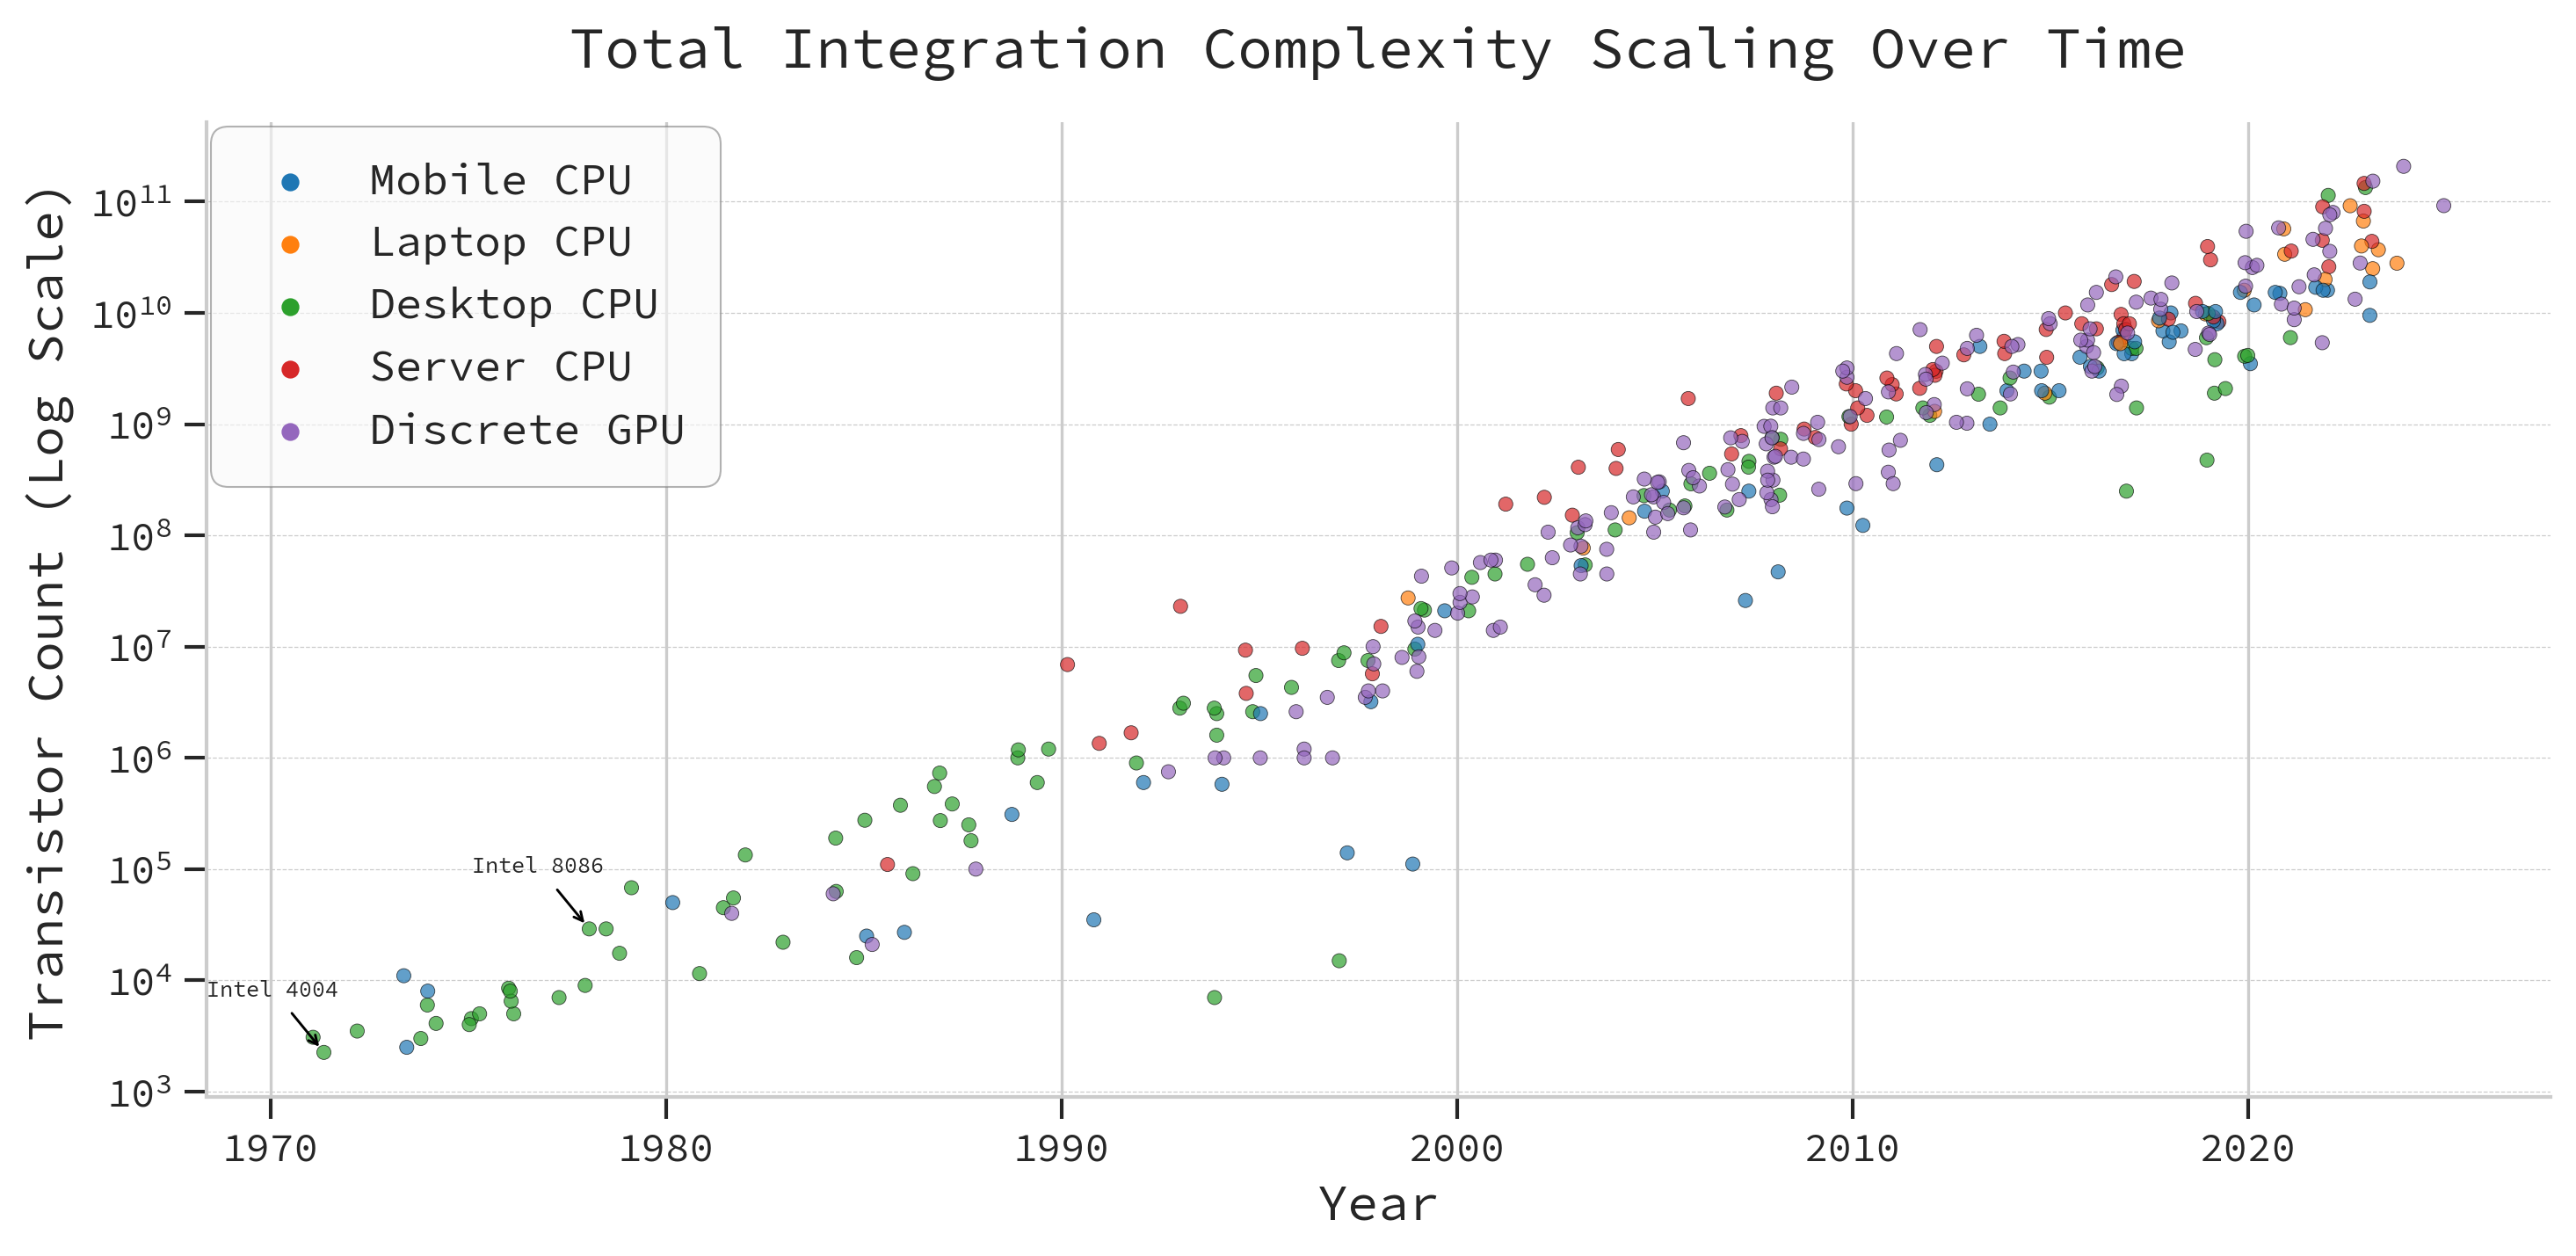

In [61]:
# Get unique product types and assign each a color
unique_types = list(product_type.categories)
color_map = mpl.colormaps["tab10"]

# Map product type to color
type_to_color = {ptype: color_map(i) for i, ptype in enumerate(unique_types)}
colors = [type_to_color[ptype] for ptype in df["product_type"]]

# Add horizontal jitter to years
years = df["year"].to_numpy()
np.random.seed(0)  # for reproducibility
jitter = np.random.normal(scale=0.2, size=len(years))  # adjust jitter scale as needed
jittered_years = years + jitter

fig, ax = plt.subplots(figsize=(10, 5))
ax.semilogy()
ax.scatter(jittered_years, df["transistor_count"], c=colors, s=15, alpha=0.7, edgecolors='k', linewidths=0.2)

#highlight_idx = df["name"] == "NVIDIA A100"
#ax.annotate("NVIDIA A100", xy=(df["year"][highlight_idx][0], df["transistor_count"][highlight_idx][0]),
#            xytext=(df["year"][highlight_idx][0] + 1, df["transistor_count"][highlight_idx][0] * 2),
#            arrowprops=dict(arrowstyle="->", color="gray"), fontsize=10)
rows_to_show = df.with_row_index().filter(pl.col('show') == True)['index']
for row_idx in rows_to_show:
    row = df[row_idx]
    print(row['name'].item())
    ax.annotate(
            row['name'].item(),
            xy=(jittered_years[row_idx], row['transistor_count'].item()),
            xytext=(4, 20),  # offset in points
            textcoords="offset points",
            fontsize=6,
            ha="right",
            va="top",
            #bbox=dict(boxstyle="round,pad=0.2", fc="white", alpha=0.7),
            arrowprops=dict(arrowstyle="->", lw=0.7, color="black")
    )

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis='both', which='major', length=6, width=1)
ax.grid(True, which="major", axis="y", linestyle="--", linewidth=0.3)

# Add legend
for ptype in unique_types:
    ax.scatter([], [], color=type_to_color[ptype], label=ptype, s=15)
legend = ax.legend(
    loc="best",
    frameon=True,
    facecolor="#f9f9f9",   # soft light gray background
    edgecolor="gray",
    framealpha=0.6
)
legend.get_frame().set_linewidth(0.5)
legend.get_frame().set_boxstyle("round,pad=0.4")

ax.set_title("Total Integration Complexity Scaling Over Time", pad=15)
fig.tight_layout(pad=2)

ax.set_ylabel("Transistor Count (Log Scale)")
ax.set_xlabel("Year")